# The logistic regression is applied to the MNIST datasets

## 1. Load MNIST dataset
Dataset of MNIST images is loaded: two datasets for training and test ($N_{train}=60,000, N_{test}=10,000$).

In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist

In [11]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalised the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0 

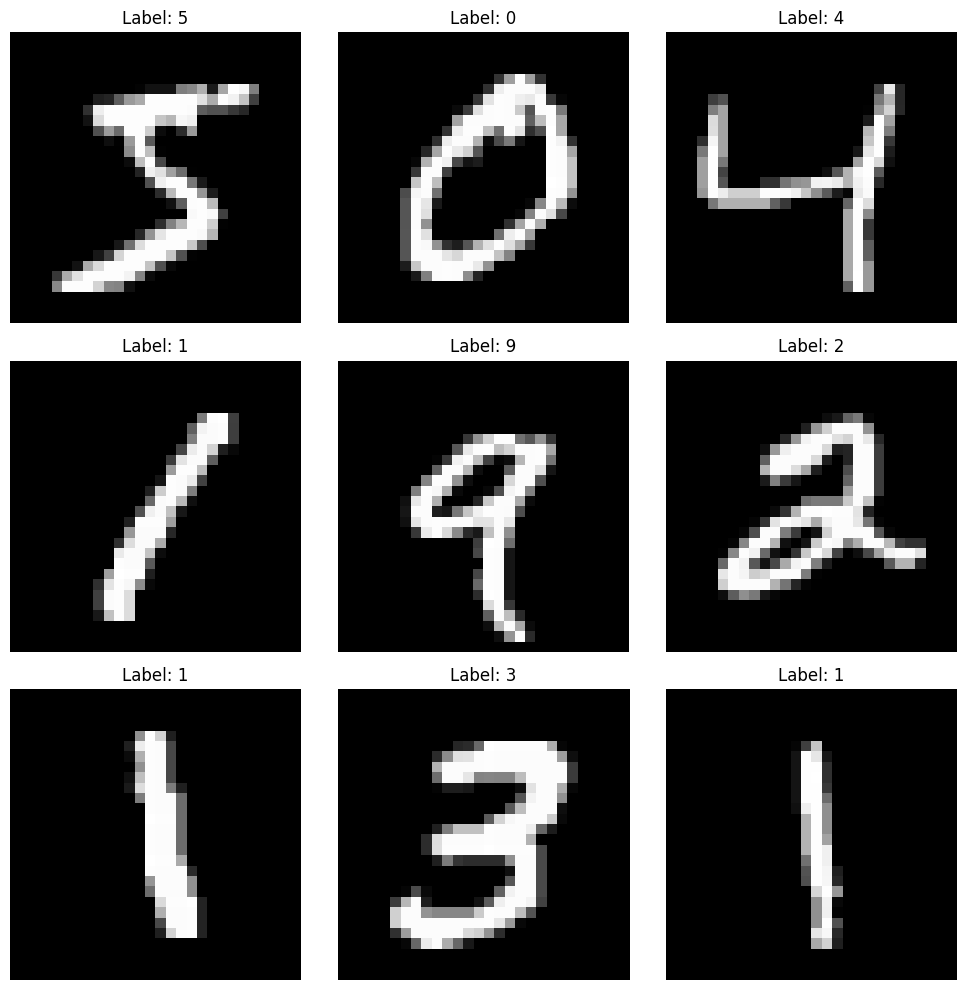

In [3]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        idx = i * 3 + j
        axes[i, j].imshow(x_train[idx], cmap='gray')
        axes[i, j].set_title(f"Label: {y_train[idx]}")
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

In [12]:
x_test_pr = x_test

In [13]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

## 2. Search the best parameter for C 
First, the logistic regression is performed and search the optimal parameter C.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [18]:
param_grid = [0.01, 0.1, 1, 10, 100]
#param_grid = {'C': [0.1, 1]}

In [20]:
train_scores = []
test_scores = []

In [21]:
for C in param_grid:
    clf = LogisticRegression(C=C, penalty='l2', solver='saga', max_iter=1000)
    clf.fit(x_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(x_train))
    test_acc = accuracy_score(y_test, clf.predict(x_test))
    train_scores.append(train_acc)
    test_scores.append(test_acc) 
    print(f"C={C:<6}| Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

C=0.01  | Train Acc: 0.9185 | Test Acc: 0.9187
C=0.1   | Train Acc: 0.9321 | Test Acc: 0.9258
C=1     | Train Acc: 0.9393 | Test Acc: 0.9257


/Users/k.takai/Documents/work/C1_example/venvdir/venv_EC1_311/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=10    | Train Acc: 0.9421 | Test Acc: 0.9249
C=100   | Train Acc: 0.9424 | Test Acc: 0.9238


/Users/k.takai/Documents/work/C1_example/venvdir/venv_EC1_311/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


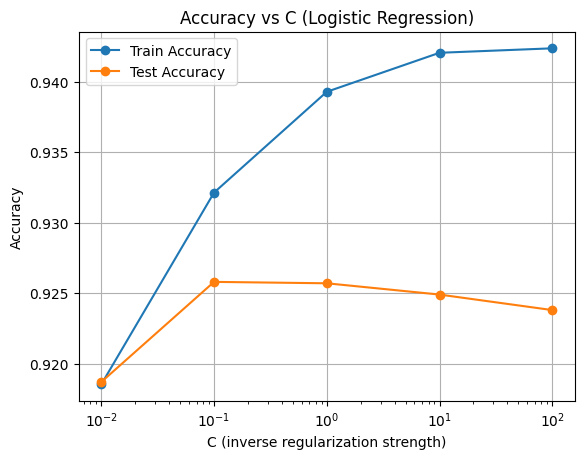

In [22]:
plt.semilogx(param_grid, train_scores, label='Train Accuracy', marker='o')
plt.semilogx(param_grid, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('C (inverse regularization strength)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C (Logistic Regression)')
plt.legend()
plt.grid(True)
plt.show()

## 3. Perform the logistic rgression with $C=0.1$
The logistic rgression is performed with the best parameter $C=0.1$ 

In [23]:
clf = LogisticRegression(C=0.1, penalty='l2', solver='saga', max_iter=5000)

In [24]:
clf.fit(x_train, y_train)

LogisticRegression(C=0.1, max_iter=5000, solver='saga')

In [25]:
y_pred = clf.predict(x_test)

In [26]:
train_acc = accuracy_score(y_train, clf.predict(x_train))
test_acc = accuracy_score(y_test, clf.predict(x_test))

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print(f"Sparsity: {100 * (clf.coef_ == 0).mean():.2f}%")

Train Accuracy: 0.9321
Test Accuracy:  0.9258
Sparsity: 8.55%


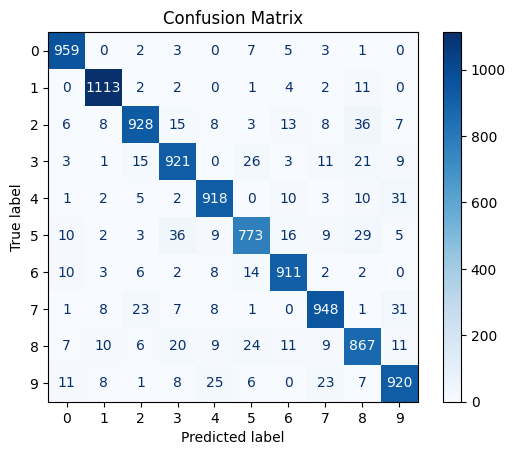

In [27]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

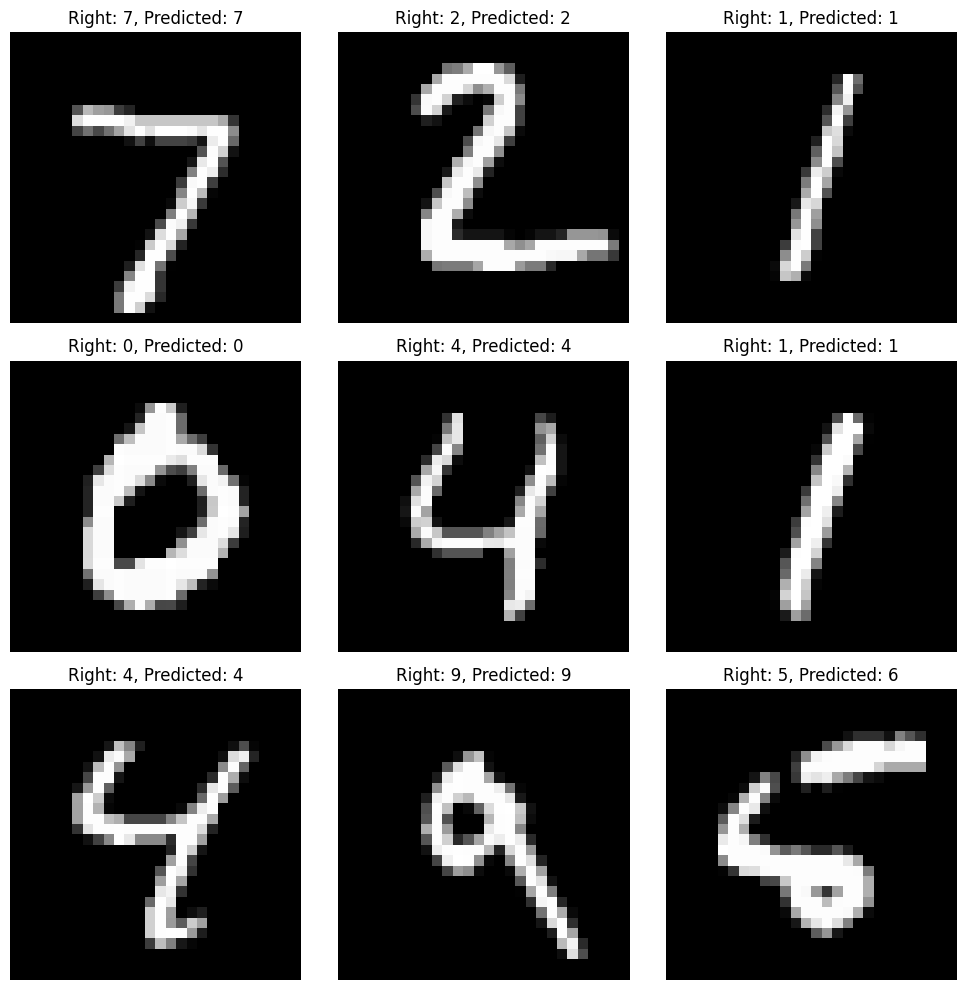

In [28]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        idx = i * 3 + j
        axes[i, j].imshow(x_test_pr[idx], cmap='gray')
        axes[i, j].set_title(f"Right: {y_test[idx]}, Predicted: {y_pred[idx]}")
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()